# 6 - Tuned Models

In [1]:
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

I am manually copying the best parameters for each configuration as the `Hyperparameters` notebook takes a long time to run, and I want this to be more useable.<p>
_(Note: XBGRegressor on my machine takes alpha and lambda as `reg_alpha` and `reg_lambda`, otherwise it doesn't recognize the variable.)_<p>
_(Memo to me: the `X_train`s and `X_test`s change depending on what columns got dropped, but the target variable does not. It's always the same `y_train`s and `y_test`s.)_

## Tuned with all features

**DC set, all features parameters**:<br>
alpha=0.1, lambda=100, learning_rate=0.3, max_depth=6, n_estimators=180, objective='reg:squarederror', random_state=42

In [2]:
X_train_dc = pd.read_pickle('../pickles/split/X_train_dc.pkl')
X_test_dc = pd.read_pickle('../pickles/split/X_test_dc.pkl')
y_train_dc = pd.read_pickle('../pickles/split/y_train_dc.pkl')
y_test_dc = pd.read_pickle('../pickles/split/y_test_dc.pkl')

In [3]:
xgb_dc_allfeat = XGBRegressor(reg_alpha=0.1, reg_lambda=100, learning_rate=0.3, max_depth=6, n_estimators=180, objective='reg:squarederror', random_state=42)
xgb_dc_allfeat.fit(X_train_dc,y_train_dc)

dc_allfeat_pred_train = xgb_dc_allfeat.predict(X_train_dc)
dc_allfeat_pred_test = xgb_dc_allfeat.predict(X_test_dc)

In [4]:
dc_allfeat_rmse_train = root_mean_squared_error(y_train_dc, dc_allfeat_pred_train)
dc_allfeat_r2_train = r2_score(y_train_dc, dc_allfeat_pred_train)

dc_allfeat_rmse_test = root_mean_squared_error(y_test_dc, dc_allfeat_pred_test)
dc_allfeat_r2_test = r2_score(y_test_dc, dc_allfeat_pred_test)

In [5]:
print(f'Train: \nRoot Mean Squared Error: {dc_allfeat_rmse_train} \nR-Squared: {dc_allfeat_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {dc_allfeat_rmse_test} \nR-Squared: {dc_allfeat_r2_test}')

Train: 
Root Mean Squared Error: 27.238070723611994 
R-Squared: 0.973456859588623
Test: 
Root Mean Squared Error: 68.69202506023652 
R-Squared: 0.9029864072799683


**London set, all features parameters**:<br>
alpha=0.75, lambda=125, learning_rate=0.3, max_depth=7, n_estimators=70, objective='reg:squarederror', random_state=42

In [6]:
X_train_l = pd.read_pickle('../pickles/split/X_train_l.pkl')
X_test_l = pd.read_pickle('../pickles/split/X_test_l.pkl')
y_train_l = pd.read_pickle('../pickles/split/y_train_l.pkl')
y_test_l = pd.read_pickle('../pickles/split/y_test_l.pkl')

In [7]:
xgb_lond_allfeat = XGBRegressor(reg_alpha=0.75, reg_lambda=125, learning_rate=0.3, max_depth=7, n_estimators=70, objective='reg:squarederror', random_state=42)
xgb_lond_allfeat.fit(X_train_l,y_train_l)

l_allfeat_pred_train = xgb_lond_allfeat.predict(X_train_l)
l_allfeat_pred_test = xgb_lond_allfeat.predict(X_test_l)

In [8]:
l_allfeat_rmse_train = root_mean_squared_error(y_train_l,l_allfeat_pred_train)
l_allfeat_r2_train = r2_score(y_train_l,l_allfeat_pred_train)

l_allfeat_rmse_test = root_mean_squared_error(y_test_l,l_allfeat_pred_test)
l_allfeat_r2_test = r2_score(y_test_l,l_allfeat_pred_test)

In [9]:
print(f'Train: \nRoot Mean Squared Error: {l_allfeat_rmse_train} \nR-Squared: {l_allfeat_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {l_allfeat_rmse_test} \nR-Squared: {l_allfeat_r2_test}')

Train: 
Root Mean Squared Error: 193.01304210896097 
R-Squared: 0.9677050709724426
Test: 
Root Mean Squared Error: 299.93461916669133 
R-Squared: 0.929388165473938


## Tuned with Forward/Backward Select Features

**DC set, Fw features parameters**:<p>
alpha=2, lambda=50, learning_rate=0.2, max_depth=6, n_estimators=370, objective='reg:squarederror', random_state=42

In [10]:
X_train_dc_fw = pd.read_pickle('../pickles/split/feat-select/forward/X_train_dc_fw.pkl')
X_test_dc_fw = pd.read_pickle('../pickles/split/feat-select/forward/X_test_dc_fw.pkl')

In [11]:
xgb_dc_fw = XGBRegressor(reg_alpha=2, reg_lambda=50, learning_rate=0.2, max_depth=6, n_estimators=370, objective='reg:squarederror', random_state=42)
xgb_dc_fw.fit(X_train_dc_fw,y_train_dc)

dc_fw_pred_train = xgb_dc_fw.predict(X_train_dc_fw)
dc_fw_pred_test = xgb_dc_fw.predict(X_test_dc_fw)

In [12]:
dc_fw_rmse_train = root_mean_squared_error(y_train_dc,dc_fw_pred_train)
dc_fw_r2_train = r2_score(y_train_dc,dc_fw_pred_train)

dc_fw_rmse_test = root_mean_squared_error(y_test_dc,dc_fw_pred_test)
dc_fw_r2_test = r2_score(y_test_dc,dc_fw_pred_test)

In [13]:
print(f'Train: \nRoot Mean Squared Error: {dc_fw_rmse_train} \nR-Squared: {dc_fw_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {dc_fw_rmse_test} \nR-Squared: {dc_fw_r2_test}')

Train: 
Root Mean Squared Error: 26.703059102966954 
R-Squared: 0.9744893908500671
Test: 
Root Mean Squared Error: 69.0043321805836 
R-Squared: 0.9021022915840149


**DC set, Bw features parameters**:<p>
alpha=0.7, lambda=80, learning_rate=0.2, max_depth=6, n_estimators=280, objective='reg:squarederror', random_state=42

In [14]:
X_train_dc_bw = pd.read_pickle('../pickles/split/feat-select/backward/X_train_dc_bw.pkl')
X_test_dc_bw = pd.read_pickle('../pickles/split/feat-select/backward/X_test_dc_bw.pkl')

In [15]:
xgb_dc_bw = XGBRegressor(reg_alpha=0.7, reg_lambda=80, learning_rate=0.2, max_depth=6, n_estimators=280, objective='reg:squarederror', random_state=42)
xgb_dc_bw.fit(X_train_dc_bw,y_train_dc)

dc_bw_pred_train = xgb_dc_bw.predict(X_train_dc_bw)
dc_bw_pred_test = xgb_dc_bw.predict(X_test_dc_bw)

In [16]:
dc_bw_rmse_train = root_mean_squared_error(y_train_dc,dc_bw_pred_train)
dc_bw_r2_train = r2_score(y_train_dc,dc_bw_pred_train)

dc_bw_rmse_test = root_mean_squared_error(y_test_dc,dc_bw_pred_test)
dc_bw_r2_test = r2_score(y_test_dc,dc_bw_pred_test)

In [17]:
print(f'Train: \nRoot Mean Squared Error: {dc_bw_rmse_train} \nR-Squared: {dc_bw_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {dc_bw_rmse_test} \nR-Squared: {dc_bw_r2_test}')

Train: 
Root Mean Squared Error: 30.41702162538651 
R-Squared: 0.9668996334075928
Test: 
Root Mean Squared Error: 70.3963388464237 
R-Squared: 0.8981127142906189


**London set, FwBw features parameters**:<p>
alpha=0.01, lambda=10, learning_rate=0.1, max_depth=6, n_estimators=150, objective='reg:squarederror', random_state=42

In [18]:
X_train_l_fwbw = pd.read_pickle('../pickles/split/feat-select/fwbw/X_train_l_fwbw.pkl')
X_test_l_fwbw = pd.read_pickle('../pickles/split/feat-select/fwbw/X_test_l_fwbw.pkl')

In [19]:
xgb_lond_fwbw = XGBRegressor(reg_alpha=0.01, reg_lambda=10, learning_rate=0.1, max_depth=6, n_estimators=150, objective='reg:squarederror', random_state=42)
xgb_lond_fwbw.fit(X_train_l_fwbw,y_train_l)

l_fwbw_pred_train = xgb_lond_fwbw.predict(X_train_l_fwbw)
l_fwbw_pred_test = xgb_lond_fwbw.predict(X_test_l_fwbw)

In [20]:
l_fwbw_rmse_train = root_mean_squared_error(y_train_l,l_fwbw_pred_train)
l_fwbw_r2_train = r2_score(y_train_l,l_fwbw_pred_train)

l_fwbw_rmse_test = root_mean_squared_error(y_test_l,l_fwbw_pred_test)
l_fwbw_r2_test = r2_score(y_test_l,l_fwbw_pred_test)

In [21]:
print(f'Train: \nRoot Mean Squared Error: {l_fwbw_rmse_train} \nR-Squared: {l_fwbw_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {l_fwbw_rmse_test} \nR-Squared: {l_fwbw_r2_test}')

Train: 
Root Mean Squared Error: 203.8147280096299 
R-Squared: 0.9639892578125
Test: 
Root Mean Squared Error: 302.22028719136216 
R-Squared: 0.9283078908920288


## Tuned with Lasso Select Features

**DC set, Lasso features parameters**:<p>
alpha=1, lambda=130, learning_rate=0.2, max_depth=6, n_estimators=190, objective='reg:squarederror', random_state=42

In [22]:
X_train_dc_lasso = pd.read_pickle('../pickles/split/feat-select/lasso/X_train_dc_lasso.pkl')
X_test_dc_lasso = pd.read_pickle('../pickles/split/feat-select/lasso/X_test_dc_lasso.pkl')

In [23]:
xgb_dc_lasso = XGBRegressor(reg_alpha=1, reg_lambda=130, learning_rate=0.2, max_depth=6, n_estimators=190, objective='reg:squarederror', random_state=42)
xgb_dc_lasso.fit(X_train_dc_lasso,y_train_dc)

dc_lasso_pred_train = xgb_dc_lasso.predict(X_train_dc_lasso)
dc_lasso_pred_test = xgb_dc_lasso.predict(X_test_dc_lasso)

In [24]:
dc_lasso_rmse_train = root_mean_squared_error(y_train_dc,dc_lasso_pred_train)
dc_lasso_r2_train = r2_score(y_train_dc,dc_lasso_pred_train)

dc_lasso_rmse_test = root_mean_squared_error(y_test_dc,dc_lasso_pred_test)
dc_lasso_r2_test = r2_score(y_test_dc,dc_lasso_pred_test)

In [25]:
print(f'Train: \nRoot Mean Squared Error: {dc_lasso_rmse_train} \nR-Squared: {dc_lasso_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {dc_lasso_rmse_test} \nR-Squared: {dc_lasso_r2_test}')

Train: 
Root Mean Squared Error: 35.664152702379106 
R-Squared: 0.9544945955276489
Test: 
Root Mean Squared Error: 73.38944653955072 
R-Squared: 0.8892644643783569


**London set, Lasso features parameters**:<p>
alpha=0.01, lambda=10, learning_rate=0.1, max_depth=6, n_estimators=160, objective='reg:squarederror', random_state=42

In [26]:
X_train_l_lasso = pd.read_pickle('../pickles/split/feat-select/lasso/X_train_l_lasso.pkl')
X_test_l_lasso = pd.read_pickle('../pickles/split/feat-select/lasso/X_test_l_lasso.pkl')

In [27]:
xgb_lond_lasso = XGBRegressor(reg_alpha=0.01, reg_lambda=10, learning_rate=0.1, max_depth=6, n_estimators=160, objective='reg:squarederror', random_state=42)
xgb_lond_lasso.fit(X_train_l_lasso,y_train_l)

l_lasso_pred_train = xgb_lond_lasso.predict(X_train_l_lasso)
l_lasso_pred_test = xgb_lond_lasso.predict(X_test_l_lasso)

In [28]:
l_lasso_rmse_train = root_mean_squared_error(y_train_l,l_lasso_pred_train)
l_lasso_r2_train = r2_score(y_train_l,l_lasso_pred_train)

l_lasso_rmse_test = root_mean_squared_error(y_test_l,l_lasso_pred_test)
l_lasso_r2_test = r2_score(y_test_l,l_lasso_pred_test)

In [29]:
print(f'Train: \nRoot Mean Squared Error: {l_lasso_rmse_train} \nR-Squared: {l_lasso_r2_train}')
print(f'Test: \nRoot Mean Squared Error: {l_lasso_rmse_test} \nR-Squared: {l_lasso_r2_test}')

Train: 
Root Mean Squared Error: 189.72241781819864 
R-Squared: 0.9687969088554382
Test: 
Root Mean Squared Error: 286.0157863908551 
R-Squared: 0.9357897639274597


## Comparisons<p>
Now it is possible to compare all the models' performances. Since all of them use `XGBRegressor`, I am comparing the untuned model to the tuned ones, and also which, if any, feature selection method did the best.<p>
First, I'm going to look at the DC dataset.

In [30]:
print(f"DC set testing R2 values: \n Basic model:        0.8994784355163574 \n Tuned all features: {dc_allfeat_r2_test} \n Fw features:        {dc_fw_r2_test}")
print(f" Bw features:        {dc_bw_r2_test} \n Lasso features:     {dc_lasso_r2_test}")

DC set testing R2 values: 
 Basic model:        0.8994784355163574 
 Tuned all features: 0.9029864072799683 
 Fw features:        0.9021022915840149
 Bw features:        0.8981127142906189 
 Lasso features:     0.8892644643783569


These R2 values stayed very consistent, regardless of tuning or feature selection.

In [31]:
print(f"R2 decreases from training to test, DC set: \n Basic model:        0.08 \n Tuned all features: {round(dc_allfeat_r2_train-dc_allfeat_r2_test,3)}")
print(f" Fw features:        {round(dc_fw_r2_train-dc_fw_r2_test,3)} \n Bw features:        {round(dc_bw_r2_train-dc_bw_r2_test,3)}")
print(f" Lasso features:     {round(dc_lasso_r2_train-dc_lasso_r2_test,3)}")

R2 decreases from training to test, DC set: 
 Basic model:        0.08 
 Tuned all features: 0.07
 Fw features:        0.072 
 Bw features:        0.069
 Lasso features:     0.065


The difference in R2 between train and test ranged from 0.06 to 0.08. There was a small improvment for tuned models over the untuned one.

In [32]:
print(f"\nDC set RMSE values: \n Basic model:         69.92294989890084 \n Tuned all features:  {dc_allfeat_rmse_test} \n Fw features:         {dc_fw_rmse_test}")
print(f" Bw features:         {dc_bw_rmse_test} \n Lasso features:      {dc_lasso_rmse_test}")


DC set RMSE values: 
 Basic model:         69.92294989890084 
 Tuned all features:  68.69202506023652 
 Fw features:         69.0043321805836
 Bw features:         70.3963388464237 
 Lasso features:      73.38944653955072


All of the RMSE values are very close together, within ~6.6 of each other.

In [33]:
print(f"RMSE increase from training to test, DC set: \n Basic model:        35.832 \n Tuned all features: {round(dc_allfeat_rmse_test-dc_allfeat_rmse_train,3)}")
print(f" Fw features:        {round(dc_fw_rmse_test-dc_fw_rmse_train,3)} \n Bw features:        {round(dc_bw_rmse_test-dc_bw_rmse_train,3)}")
print(f" Lasso features:     {round(dc_lasso_rmse_test-dc_lasso_rmse_train,3)}")

RMSE increase from training to test, DC set: 
 Basic model:        35.832 
 Tuned all features: 41.454
 Fw features:        42.301 
 Bw features:        39.979
 Lasso features:     37.725


The amount the error increased by is also very similar for all versions of the model, and comes close to doubling in many cases, but without looking at the full range of values in the data, that doesn't mean much on its own. I will do that later. 

Now to repeat those steps for the London dataset.

In [34]:
print(f"London set testing R2 values: \n Basic model:        0.9133748412132263 \n Tuned all features: {l_allfeat_r2_test}")
print(f" FwBw features:      {l_fwbw_r2_test} \n Lasso features:     {l_lasso_r2_test}")

London set testing R2 values: 
 Basic model:        0.9133748412132263 
 Tuned all features: 0.929388165473938
 FwBw features:      0.9283078908920288 
 Lasso features:     0.9357897639274597


These R2 values are also very consistent, regardless of tuning or feature selection.

In [35]:
print(f"R2 decreases from training to test, London set: \n Basic model:        0.072 \n Tuned all features: {round(l_allfeat_r2_train-l_allfeat_r2_test,3)}")
print(f" FwBw features:      {round(l_fwbw_r2_train-l_fwbw_r2_test,3)} \n Lasso features:     {round(l_lasso_r2_train-l_lasso_r2_test,3)}")

R2 decreases from training to test, London set: 
 Basic model:        0.072 
 Tuned all features: 0.038
 FwBw features:      0.036 
 Lasso features:     0.033


The difference in R2 between the train and test sets is much smaller for tuned models on this dataset. That was still the case on the DC dataset, but the difference was smaller. 

In [36]:
print(f"London set testing RMSE values: \n Basic model:        332.20786503370334 \n Tuned all features: {l_allfeat_rmse_test}")
print(f" FwBw features:      {l_fwbw_rmse_test} \n Lasso features:     {l_lasso_rmse_test}")

London set testing RMSE values: 
 Basic model:        332.20786503370334 
 Tuned all features: 299.93461916669133
 FwBw features:      302.22028719136216 
 Lasso features:     286.0157863908551


In [37]:
print(f"RMSE increase from training to test, London set: \n Basic model:        203.221 \n Tuned all features: {round(l_allfeat_rmse_test-l_allfeat_rmse_train,3)}")
print(f" FwBw features:       {round(l_fwbw_rmse_test-l_fwbw_rmse_train,3)} \n Lasso features:      {round(l_lasso_rmse_test-l_lasso_rmse_train,3)}")

RMSE increase from training to test, London set: 
 Basic model:        203.221 
 Tuned all features: 106.922
 FwBw features:       98.406 
 Lasso features:      96.293


This time there is a lot of difference in the amount the error increased between the training and test sets; the tuned models have a much smaller increase, and the feature selected versions are slightly smaller still. 

With both sets, the difference between the three tuned models was very slight, and the difference between those and the basic model was still slight.<p>
Both models have a high R2 score, so it seems that the models do a good job of accounting for the data. To get an idea of if the RMSE is in a decent range or not, we need to know the maximum values in each set. (The minimum is 0.) Looking at the RMSE makes it seem like `XGBRegressor` is better able to handle the London dataset, but given that data has higher count values, that might not actually be true. 

In [38]:
dc_data = pd.read_pickle('../pickles/dc_data.pkl')
london_data = pd.read_pickle('../pickles/london_data.pkl')

In [39]:
print('DC count max:',dc_data['count'].max())
print('London count max:',london_data['count'].max())

DC count max: 977
London count max: 7860


Now we can see, proportionally, how much the error there was, and how much the error was increasing from training to test.

In [40]:
dc_max = 977 
london_max = 7860

In [41]:
print(f"DC set, RMSE as percentage of range: \nBasic model:        {round(69.92294989890084/dc_max*100,2)} \nTuned all features: {round(dc_allfeat_rmse_test/dc_max*100,2)}")
print(f"Fw features:        {round(dc_fw_rmse_test/dc_max*100,2)} \nBw features:        {round(dc_bw_rmse_test/dc_max*100,2)} \nLasso features:     {round(dc_lasso_rmse_test/dc_max*100,2)}")
print(f"\nDC set, RMSE increase as percent of range: \nBasic model:        {round(35.832/dc_max*100,2)} \nTuned all features: {round((dc_allfeat_rmse_test-dc_allfeat_rmse_train)/dc_max*100,2)}")
print(f"Fw features:        {round((dc_fw_rmse_test-dc_fw_rmse_train)/dc_max*100,2)} \nBw features:        {round((dc_bw_rmse_test-dc_bw_rmse_train)/dc_max*100,2)}") 
print(f"Lasso features:     {round((dc_lasso_rmse_test-dc_lasso_rmse_train)/dc_max*100,2)}")

DC set, RMSE as percentage of range: 
Basic model:        7.16 
Tuned all features: 7.03
Fw features:        7.06 
Bw features:        7.21 
Lasso features:     7.51

DC set, RMSE increase as percent of range: 
Basic model:        3.67 
Tuned all features: 4.24
Fw features:        4.33 
Bw features:        4.09
Lasso features:     3.86


In [42]:
print(f"London set, RMSE as percentage of range: \nBasic model:        {round(332.20786503370334/london_max*100,2)} \nTuned all features: {round(l_allfeat_rmse_test/london_max*100,2)}")
print(f"FwBw features:      {round(l_fwbw_rmse_test/london_max*100,2)} \nLasso features:     {round(l_lasso_rmse_test/london_max*100,2)}")
print(f"\nLondon set, RMSE increase as percent of range: \nBasic model:        {round(203.221/london_max*100,2)}")
print(f"Tuned all features: {round((l_allfeat_rmse_test-l_allfeat_rmse_train)/london_max*100,2)} \nFwBw features:      {round((l_fwbw_rmse_test-l_fwbw_rmse_train)/london_max*100,2)}")
print(f"Lasso features:     {round((l_lasso_rmse_test-l_lasso_rmse_train)/london_max*100,2)}")

London set, RMSE as percentage of range: 
Basic model:        4.23 
Tuned all features: 3.82
FwBw features:      3.85 
Lasso features:     3.64

London set, RMSE increase as percent of range: 
Basic model:        2.59
Tuned all features: 1.36 
FwBw features:      1.25
Lasso features:     1.23


Additionally, if we compare the RMSE to the count standard deviation for each set - 

In [43]:
print(f"DC's count's std:  {round(dc_data['count'].std(),1)} \nDC'S worst RMSE: ~73")
print(f"\nLondon's count's std: {round(london_data['count'].std(),1)} \nLondon's worst RMSE: ~332")

DC's count's std:  181.5 
DC'S worst RMSE: ~73

London's count's std: 1085.4 
London's worst RMSE: ~332


In both cases, the RMSE is significantly lower than the standard deviation, so the model is accounting for a good portion of the variation occuring.<p>
Looking at the error from this perspective, it's clear that the model is in fact doing quite well at accounting for the variations in the datasets.

## Feature Appraisal 

In [44]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

I'm using `SHAP` to show how each feature effected the model.

In [45]:
dc_allfeat_explainer = shap.Explainer(xgb_dc_allfeat)
dc_fw_explainer = shap.Explainer(xgb_dc_fw)
dc_bw_explainer = shap.Explainer(xgb_dc_bw)
dc_lasso_explainer = shap.Explainer(xgb_dc_lasso)

dc_allfeat_values = dc_allfeat_explainer(X_test_dc)
dc_fw_values = dc_fw_explainer(X_test_dc_fw)
dc_bw_values = dc_bw_explainer(X_test_dc_bw)
dc_lasso_values = dc_lasso_explainer(X_test_dc_lasso)

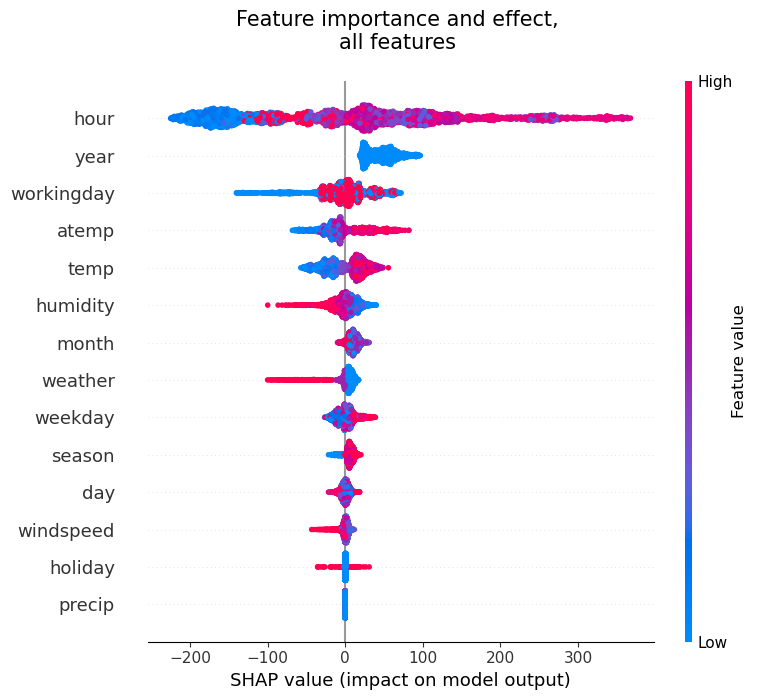

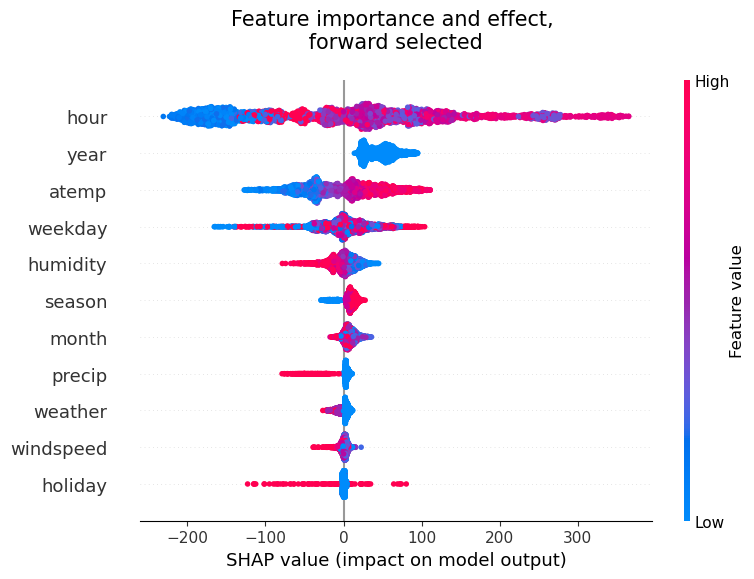

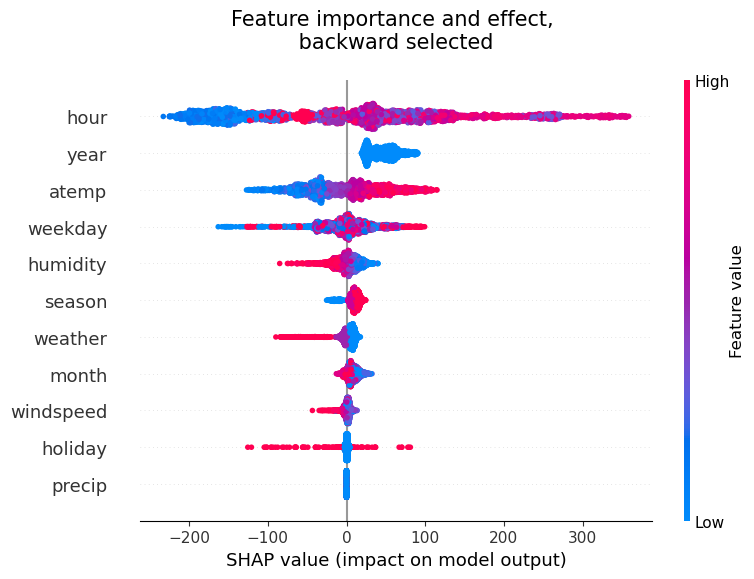

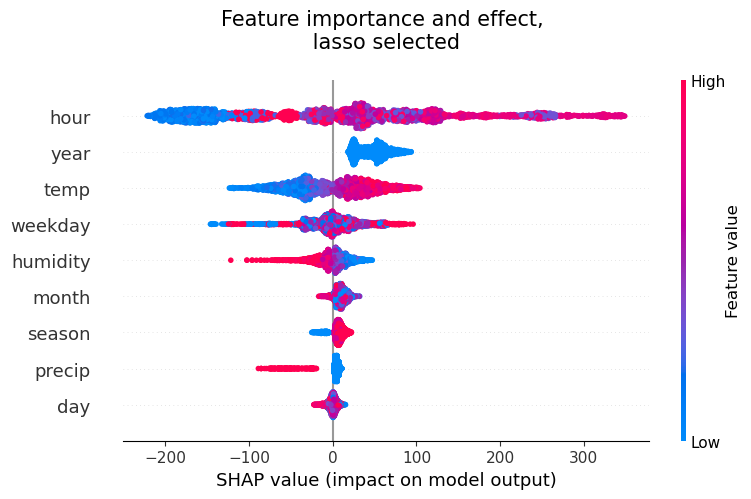

In [46]:
plt.title('Feature importance and effect, \nall features \n',fontsize=15)
shap.summary_plot(dc_allfeat_values, X_test_dc)

plt.title('Feature importance and effect, \n forward selected \n',fontsize=15)
shap.summary_plot(dc_fw_values, X_test_dc_fw)

plt.title('Feature importance and effect, \n backward selected \n',fontsize=15)
shap.summary_plot(dc_bw_values, X_test_dc_bw)

plt.title('Feature importance and effect, \n lasso selected \n',fontsize=15)
shap.summary_plot(dc_lasso_values, X_test_dc_lasso)

Most of these weather feature impacts make sense; higher temp and apparent temp increase usage, higher humidity and weedspeed decrease usage, and vice versa. The behavior of weather and precip depend somewhat on which features are in the model, but when they effect the model, a higher weather value, which corresponds to more severe weather, decreases usage, as does a 1 for precipitation. Neither have much of a positive impact on the model, however.<p>
The unexpected impact is that the higher season values, corresponding to fall (3) and winter (4) cause the model to increase, despite correlating with other values that have negative impacts, while the low values cuase a decrease. I don't know why that could be.

In [47]:
l_allfeat_explainer = shap.Explainer(xgb_lond_allfeat)
l_fwbw_explainer = shap.Explainer(xgb_lond_fwbw)
l_lasso_explainer = shap.Explainer(xgb_lond_lasso)

l_allfeat_values = l_allfeat_explainer(X_test_l)
l_fwbw_values = l_fwbw_explainer(X_test_l_fwbw)
l_lasso_values = l_lasso_explainer(X_test_l_lasso)

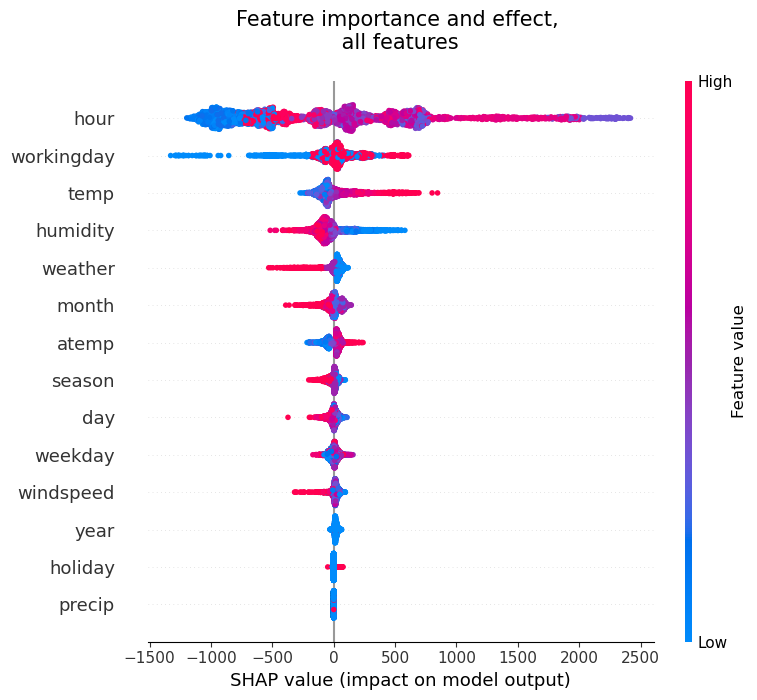

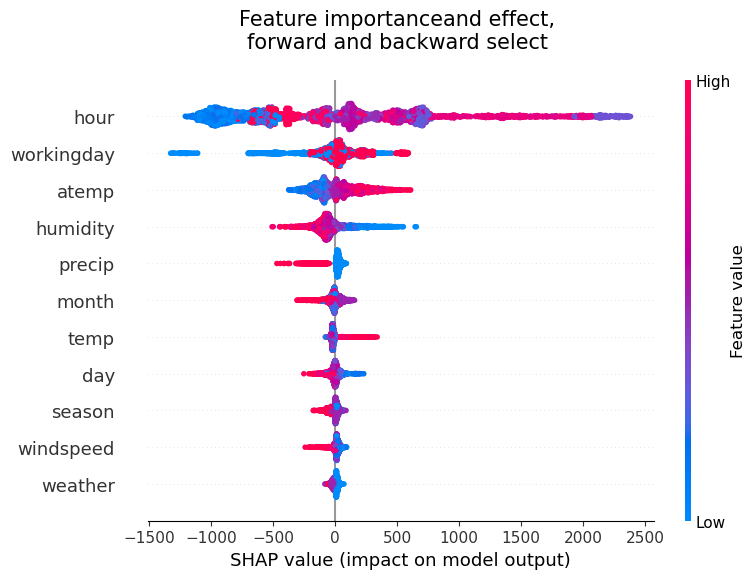

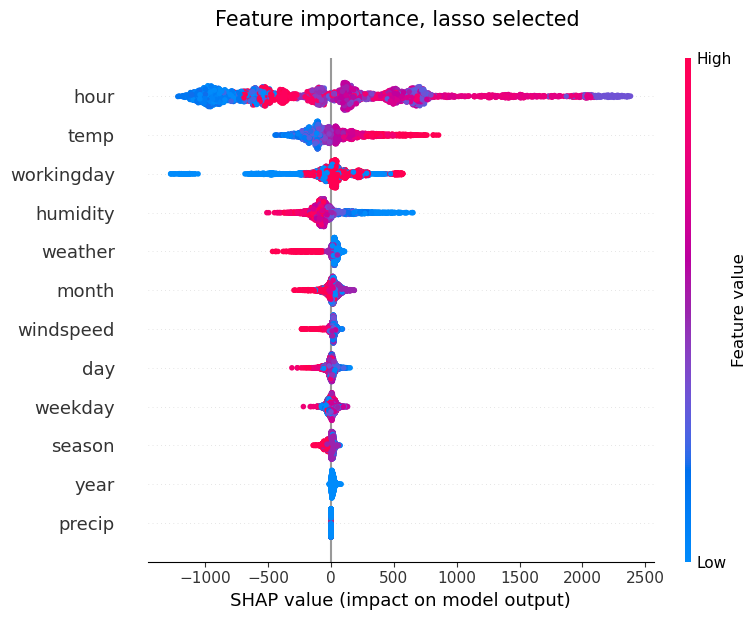

In [48]:
plt.title('Feature importance and effect, \n all features \n',fontsize=15)
shap.summary_plot(l_allfeat_values, X_test_l)

plt.title('Feature importanceand effect, \nforward and backward select \n', fontsize=15)
shap.summary_plot(l_fwbw_values, X_test_l_fwbw)

plt.title('Feature importance, lasso selected \n',fontsize=15)
shap.summary_plot(l_lasso_values, X_test_l_lasso)

This time, all of the weather related features have impacts that logically makes sense. High temperature and apparent temperature cause an increase, low one case a decrease. High humidity causes a decrease, low humidity causes a small increase, as does high/severe weather. Windspeed never has a significant positive effect on the model, but high numbers generally have a negative effect. The precip column does not always have an effect, but when it does the 1 value always has a negative effect.<p> And finally, this time the high value seasons, fall and winter, cause a decrease in the model, which makes sense given they are generally colder. 

In [49]:
# save the above plots
import matplotlib
matplotlib.use('Agg')

# DC set
plt.title('Feature importance and effect, \nall features \n',fontsize=15)
shap.summary_plot(dc_allfeat_values, X_test_dc)
plt.savefig('charts/dc_allfeat_impacts.png',bbox_inches='tight')
plt.close()

plt.title('Feature importance and effect, \n forward selected \n',fontsize=15)
shap.summary_plot(dc_fw_values, X_test_dc_fw)
plt.savefig('charts/dc_fw_impacts.png',bbox_inches='tight')
plt.close()

plt.title('Feature importance and effect, \n backward selected \n',fontsize=15)
shap.summary_plot(dc_bw_values, X_test_dc_bw)
plt.savefig('charts/dc_bw_impacts.png',bbox_inches='tight')
plt.close()

plt.title('Feature importance and effect, \n lasso selected \n',fontsize=15)
shap.summary_plot(dc_lasso_values, X_test_dc_lasso)
plt.savefig('charts/dc_lasso_impacts.png',bbox_inches='tight')
plt.close()

# London set
plt.title('Feature importance and effect, \n all features \n',fontsize=15)
shap.summary_plot(l_allfeat_values, X_test_l)
plt.savefig('charts/lond_allfeat_impacts.png',bbox_inches='tight')
plt.close()

plt.title('Feature importanceand effect, \nforward and backward select \n', fontsize=15)
shap.summary_plot(l_fwbw_values, X_test_l_fwbw)
plt.savefig('charts/lond_fwbw_impacts.png',bbox_inches='tight')
plt.close()

plt.title('Feature importance, lasso selected \n',fontsize=15)
shap.summary_plot(l_lasso_values, X_test_l_lasso)
plt.savefig('charts/lond_lasso_impacts.png',bbox_inches='tight')
plt.close()

c:\Users\mebar\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
c:\Users\mebar\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
c:\Users\mebar\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
c:\Users\mebar\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
c:\Users\mebar\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
c:\Users\mebar\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:952: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pl.show()
c:\Users\mebar\anaconda3\Lib\site-packages\shap\plot